In [137]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.metrics import auc, roc_curve,classification_report
from sklearn.tree import DecisionTreeClassifier,export_graphviz

In [54]:
user = pd.read_csv('user_table.csv')
user.head()

,user_id,date,device,sex
0,450007,2015-02-28,Desktop,Female
1,756838,2015-01-13,Desktop,Male
2,568983,2015-04-09,Desktop,Male
3,190794,2015-02-18,Desktop,Female
4,537909,2015-01-15,Desktop,Male


In [7]:
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90400 entries, 0 to 90399
Data columns (total 4 columns):
user_id    90400 non-null int64
date       90400 non-null object
device     90400 non-null object
sex        90400 non-null object
dtypes: int64(1), object(3)
memory usage: 2.8+ MB


In [55]:
homepage = pd.read_csv('home_page_table.csv')
homepage.head()

,user_id,page
0,313593,home_page
1,468315,home_page
2,264005,home_page
3,290784,home_page
4,639104,home_page


In [10]:
homepage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90400 entries, 0 to 90399
Data columns (total 2 columns):
user_id    90400 non-null int64
page       90400 non-null object
dtypes: int64(1), object(1)
memory usage: 1.4+ MB


In [56]:
serchpage = pd.read_csv('search_page_table.csv')
serchpage.head()

,user_id,page
0,15866,search_page
1,347058,search_page
2,577020,search_page
3,780347,search_page
4,383739,search_page


In [13]:
serchpage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45200 entries, 0 to 45199
Data columns (total 2 columns):
user_id    45200 non-null int64
page       45200 non-null object
dtypes: int64(1), object(1)
memory usage: 706.3+ KB


In [15]:
paymentpage = pd.read_csv('payment_page_table.csv')
paymentpage.head()

,user_id,page
0,253019,payment_page
1,310478,payment_page
2,304081,payment_page
3,901286,payment_page
4,195052,payment_page


In [16]:
paymentpage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6030 entries, 0 to 6029
Data columns (total 2 columns):
user_id    6030 non-null int64
page       6030 non-null object
dtypes: int64(1), object(1)
memory usage: 94.3+ KB


In [18]:
confirmpage = pd.read_csv('payment_confirmation_table.csv')
confirmpage.head()

,user_id,page
0,123100,payment_confirmation_page
1,704999,payment_confirmation_page
2,407188,payment_confirmation_page
3,538348,payment_confirmation_page
4,841681,payment_confirmation_page


In [19]:
confirmpage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Data columns (total 2 columns):
user_id    452 non-null int64
page       452 non-null object
dtypes: int64(1), object(1)
memory usage: 7.1+ KB


In [77]:
df = pd.merge(user, homepage,'inner',on = 'user_id')
df = df.rename(columns= {'page':'home_page'})
df.loc[df.home_page !='home_page', 'home_page'] = 0
df.loc[df.home_page =='home_page', 'home_page'] = 1
df.head()

,user_id,date,device,sex,home_page
0,450007,2015-02-28,Desktop,Female,1
1,756838,2015-01-13,Desktop,Male,1
2,568983,2015-04-09,Desktop,Male,1
3,190794,2015-02-18,Desktop,Female,1
4,537909,2015-01-15,Desktop,Male,1


In [78]:
df = pd.merge(df,serchpage,'left', on = 'user_id')
df = df.rename(columns= {'page':'search_page'})
df.loc[df.search_page !='search_page', 'search_page'] = 0
df.loc[df.search_page =='search_page', 'search_page'] = 1
df.head()

,user_id,date,device,sex,home_page,search_page
0,450007,2015-02-28,Desktop,Female,1,0
1,756838,2015-01-13,Desktop,Male,1,0
2,568983,2015-04-09,Desktop,Male,1,1
3,190794,2015-02-18,Desktop,Female,1,1
4,537909,2015-01-15,Desktop,Male,1,0


In [79]:
df = pd.merge(df,paymentpage,'left', on = 'user_id')
df = df.rename(columns= {'page':'payment_page'})
df.loc[df.payment_page !='payment_page', 'payment_page'] = 0
df.loc[df.payment_page =='payment_page', 'payment_page'] = 1
df.head()

,user_id,date,device,sex,home_page,search_page,payment_page
0,450007,2015-02-28,Desktop,Female,1,0,0
1,756838,2015-01-13,Desktop,Male,1,0,0
2,568983,2015-04-09,Desktop,Male,1,1,0
3,190794,2015-02-18,Desktop,Female,1,1,0
4,537909,2015-01-15,Desktop,Male,1,0,0


In [80]:
df = pd.merge(df,confirmpage,'left', on = 'user_id')
df = df.rename(columns= {'page':'payment_confirmation_page'})
df.loc[df.payment_confirmation_page !='payment_confirmation_page', 'payment_confirmation_page'] = 0
df.loc[df.payment_confirmation_page =='payment_confirmation_page', 'payment_confirmation_page'] = 1
df.head()

,user_id,date,device,sex,home_page,search_page,payment_page,payment_confirmation_page
0,450007,2015-02-28,Desktop,Female,1,0,0,0
1,756838,2015-01-13,Desktop,Male,1,0,0,0
2,568983,2015-04-09,Desktop,Male,1,1,0,0
3,190794,2015-02-18,Desktop,Female,1,1,0,0
4,537909,2015-01-15,Desktop,Male,1,0,0,0


In [87]:
df.home_page.astype('int',replace = True)
df.search_page.astype('int',replace = True)
df.payment_page.astype('int',replace = True)
df.payment_confirmation_page.astype('int',replace = True)
df.head()

,user_id,date,device,sex,home_page,search_page,payment_page,payment_confirmation_page
0,450007,2015-02-28,Desktop,Female,1,0,0,0
1,756838,2015-01-13,Desktop,Male,1,0,0,0
2,568983,2015-04-09,Desktop,Male,1,1,0,0
3,190794,2015-02-18,Desktop,Female,1,1,0,0
4,537909,2015-01-15,Desktop,Male,1,0,0,0


In [91]:
#under both:
print("Users convert from homepage to search is: ", "{:.4%}".format(df.search_page.sum()/df.home_page.sum()))
print("Users convert from homepage to check-out is: ", "{:.4%}".format(df.payment_page.sum()/df.home_page.sum()))
print("Users convert from homepage to complete payment is: ", "{:.4%}".format(df.payment_confirmation_page.sum()/df.home_page.sum()))

convert from homepage to search is:  50.0000%
convert from homepage to check-out is:  6.6704%
convert from homepage to complete payment is:  0.5000%


In [94]:
#under desktop:
print("Desktop users convert from homepage to search is: ", "{:.4%}".format(df[df.device =='Desktop'].search_page.sum()/df[df.device =='Desktop'].home_page.sum()))
print("Desktop users convert from homepage to check-out is: ", "{:.4%}".format(df[df.device =='Desktop'].payment_page.sum()/df[df.device =='Desktop'].home_page.sum()))
print("Desktop users convert from homepage to complete payment is: ", "{:.4%}".format(df[df.device =='Desktop'].payment_confirmation_page.sum()/df[df.device =='Desktop'].home_page.sum()))

Desktop users convert from homepage to search is:  50.0000%
Desktop users convert from homepage to check-out is:  5.0000%
Desktop users convert from homepage to complete payment is:  0.2492%


In [96]:
#under mobile:
print("Mobile users convert from homepage to search is: ", "{:.4%}".format(df[df.device =='Mobile'].search_page.sum()/df[df.device =='Mobile'].home_page.sum()))
print("Mobile users convert from homepage to check-out is: ", "{:.4%}".format(df[df.device =='Mobile'].payment_page.sum()/df[df.device =='Mobile'].home_page.sum()))
print("Mobile users convert from homepage to complete payment is: ", "{:.4%}".format(df[df.device =='Mobile'].payment_confirmation_page.sum()/df[df.device =='Mobile'].home_page.sum()))

Mobile users convert from homepage to search is:  50.0000%
Mobile users convert from homepage to check-out is:  10.0000%
Mobile users convert from homepage to complete payment is:  1.0000%


In [104]:
cr = df.groupby('device')[['home_page','search_page','payment_page','payment_confirmation_page']].sum()
cr['home_to_search']= [df[df.device =='Desktop'].search_page.sum()/df[df.device =='Desktop'].home_page.sum(),df[df.device =='Mobile'].search_page.sum()/df[df.device =='Mobile'].home_page.sum()]
cr['home_to_check'] = [df[df.device =='Desktop'].payment_page.sum()/df[df.device =='Desktop'].home_page.sum(),df[df.device =='Mobile'].payment_page.sum()/df[df.device =='Mobile'].home_page.sum()]
cr['home_to_finish'] = [df[df.device =='Desktop'].payment_confirmation_page.sum()/df[df.device =='Desktop'].home_page.sum(),df[df.device =='Mobile'].payment_confirmation_page.sum()/df[df.device =='Mobile'].home_page.sum()]
cr['device'] =  cr.index
cr.head()

,home_page,search_page,payment_page,payment_confirmation_page,home_to_search,home_to_check,home_to_finish
device,,,,,,,
Desktop,60200,30100,3010,150,0.5,0.05,0.002492
Mobile,30200,15100,3020,302,0.5,0.10,0.010000


Looks like users who check out the website by their mobile are more likely to complete the purchase

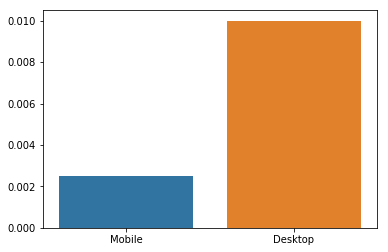

In [128]:
sns.barplot(cr.device.value_counts().index,y = cr['home_to_finish'].values)
#sns.barplot(cr.device.value_counts().index,y = cr['home_to_search'].values)

In [107]:
df.head()

,user_id,date,device,sex,home_page,search_page,payment_page,payment_confirmation_page
0,450007,2015-02-28,Desktop,Female,1,0,0,0
1,756838,2015-01-13,Desktop,Male,1,0,0,0
2,568983,2015-04-09,Desktop,Male,1,1,0,0
3,190794,2015-02-18,Desktop,Female,1,1,0,0
4,537909,2015-01-15,Desktop,Male,1,0,0,0


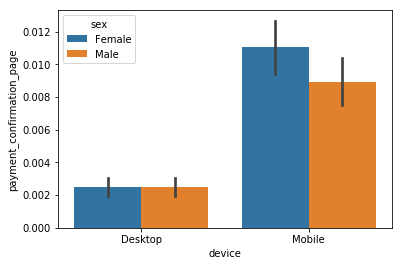

In [133]:
sns.barplot(x = df.device,y = df.payment_confirmation_page,hue = df.sex)

Women who brose the web by their mobile are more likely to buy it.

In [160]:
df.date = pd.to_datetime(df.date)
df['week'] = df.date.apply(lambda x: x.weekofyear)
df['day'] = df.date.apply(lambda x: x.dayofweek)

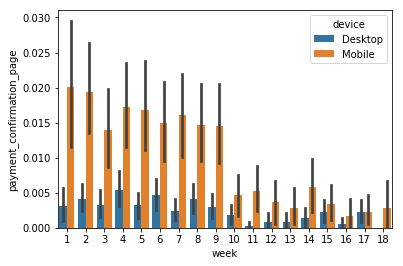

In [177]:
sns.barplot(x = df.week, y = df.payment_confirmation_page,hue = df.device)
#The first two months' sale received better results than the later. Maybe some new features or the price changed, 
#so users are more likely to churn.

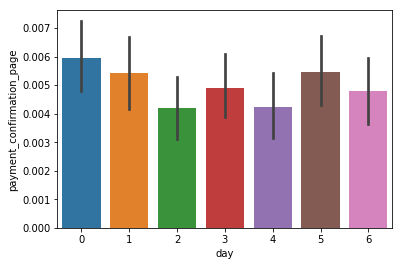

In [194]:
sns.barplot(x = df.day, y = df.payment_confirmation_page)
#people are more likely to buy the product on weekends. Even though, they are more likely to browse on Wenesday. 


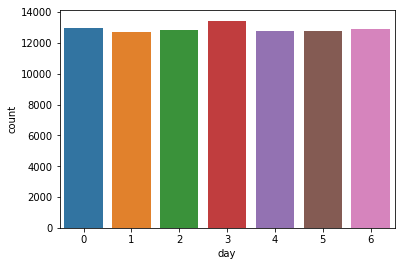

In [189]:
sns.countplot(x = df.day)

In [199]:
dum = pd.get_dummies(df,drop_first= True)
dum.head()

,user_id,date,home_page,search_page,payment_page,payment_confirmation_page,week,day,device_Mobile,sex_Male
0,450007,2015-02-28,1,0,0,0,9,5,0,0
1,756838,2015-01-13,1,0,0,0,3,1,0,1
2,568983,2015-04-09,1,1,0,0,15,3,0,1
3,190794,2015-02-18,1,1,0,0,8,2,0,0
4,537909,2015-01-15,1,0,0,0,3,3,0,1


In [210]:
dum.day = df.day.map({0:"Sun",1:"Mon",2:"Tue", 3:"Wen", 4: "Thu", 5: "Fri", 6 : "Sat"})
dum = pd.get_dummies(dum)

In [219]:
X = dum[dum.columns[7::].values]
y = dum['payment_confirmation_page']

In [231]:
from graphviz import Source 

dt = DecisionTreeClassifier(max_depth=3,min_samples_leaf=20,min_samples_split=20)
dt.fit(X,y)
graph = Source(export_graphviz(dt,feature_names=X.columns,class_names=['NotConvert','Converted'],
                proportion=True,leaves_parallel=True,filled=True))


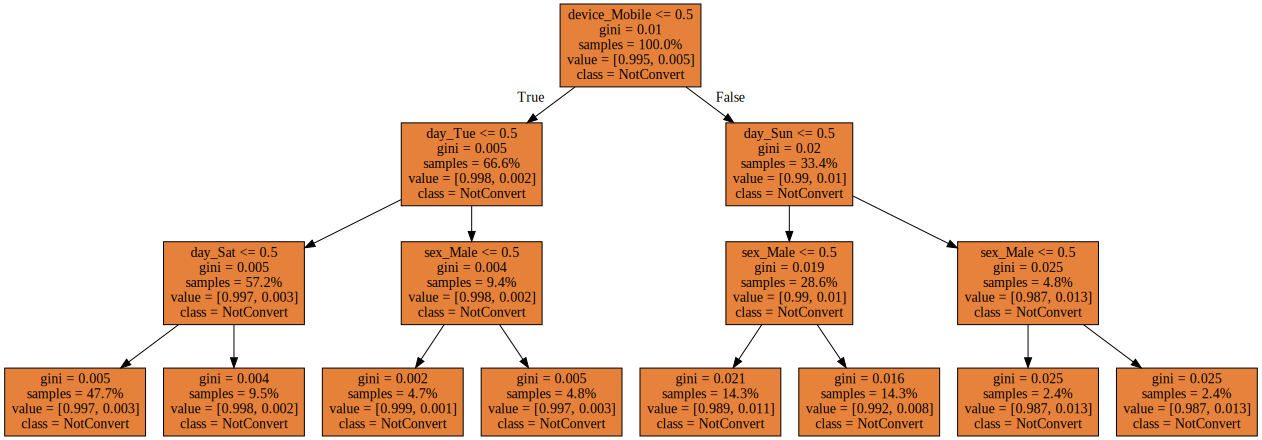

In [232]:
#Display on jupyter 
from IPython.display import SVG
SVG(graph.pipe(format = 'svg'))

In [234]:
#Download and view
graph.format = 'png'
graph.render('dtree_render', view = True)

'dtree_render.png'